The Question:

You have been hired as a data scientist by AgriSmart AI, a company specializing in AI-driven precision agriculture. The company collects data from farms using sensors and drones to monitor soil moisture, pH levels, temperature, humidity, and crop conditions to optimize irrigation and fertilization practices. You have received a dataset named climate_action_data.csv containing 913 records across 10 variables, but it contains several issues including missing values, incorrect data formats, erroneous entries labeled as 'error', and duplicate records. Your task is to load this dataset into a Pandas DataFrame and conduct a thorough data inspection to identify the structure, missing values, and data types. Clean the dataset by removing duplicate records, replacing erroneous values with NaN, and handling missing data appropriately by either filling or dropping values based on logical reasoning. After cleaning, perform an exploratory data analysis by generating descriptive statistics, visualizing the distribution of numeric variables using histograms, and creating a correlation heatmap to examine the relationships between soil and environmental variables. From your analysis, identify which variables most influence fertilizer recommendations, determine the crop type with the highest average soil moisture, and suggest appropriate irrigation adjustments for crops experiencing average temperatures above 30°C. Finally, export your clean dataset as cleaned_precision_agriculture_data.csv and document your insights and recommendations based on the analysis. (10 Marks)

To do:
- Load dataset
- Inspect dataset for structure, missing values and data types
- Clean dataset by removing duplicate records, replacing erroneous values with NaN, handing missinf data appropriately
- Perform data analysis using histograms, creating a correlation heatmap to examine soil and environmental variables
- From analysis, identify the varibales that most influence fertilizer recommendations, determine crop type, and highest average soil moisture
- Suggest appropriate irrigation adjustments for crops experiencing average temperatures abobe 30 degrees Celcius
- Export clean dataset as "cleaned_precision_agriculture_data.csv"
- Document insights based on analsysis  

In [51]:
#Making the necessary imports
import os 
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from datetime import datetime
%matplotlib inline

In [52]:
#Loading the dataset
df = pd.read_csv("datasets/climate_action_data.csv")
df.reset_index(drop=True, inplace=True)
df.head()

,Sensor_ID,Date,Soil_Moisture(%),Soil_pH,Temperature(C),Humidity(%),Crop_Type,Fertilizer_Recommended(kg/ha),Irrigation_Recommended(mm),Drone_Image_ID
0,SEN-1000,2025-01-01,36.22,6.98,21.3,50.4,Tomatoes,67.6,26.6,IMG-2000
1,SEN-1001,2025-01-02,76.55,5.03,23.5,34.3,Wheat,130.4,8.3,IMG-2001
2,SEN-1002,2025-01-03,61.24,6.52,21.9,54.6,Tomatoes,36.0,29.4,IMG-2002
3,SEN-1003,2025-01-04,51.91,6.62,24.0,48.7,Maize,85.8,19.6,IMG-2003
4,SEN-1004,2025-01-05,20.92,5.98,19.2,70.6,Wheat,75.6,29.9,IMG-2004


In [53]:
#The shape of the dataset
df.shape

(913, 10)

In [54]:
#Datatypes of the variables
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 913 entries, 0 to 912
Data columns (total 10 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   Sensor_ID                      913 non-null    object
 1   Date                           909 non-null    object
 2   Soil_Moisture(%)               913 non-null    object
 3   Soil_pH                        913 non-null    object
 4   Temperature(C)                 913 non-null    object
 5   Humidity(%)                    913 non-null    object
 6   Crop_Type                      909 non-null    object
 7   Fertilizer_Recommended(kg/ha)  913 non-null    object
 8   Irrigation_Recommended(mm)     913 non-null    object
 9   Drone_Image_ID                 913 non-null    object
dtypes: object(10)
memory usage: 71.5+ KB


In [55]:
#Missing data
df.isna().sum()

Sensor_ID                        0
Date                             4
Soil_Moisture(%)                 0
Soil_pH                          0
Temperature(C)                   0
Humidity(%)                      0
Crop_Type                        4
Fertilizer_Recommended(kg/ha)    0
Irrigation_Recommended(mm)       0
Drone_Image_ID                   0
dtype: int64

Immediate issues
- Column            : Issue
- Date              : Missing values
- Crop_Type         : Missing values
- Soil_Moisture(%), Soil_pH, Temperature(C), Humidity(%)  : Numeric values stires as object(likely with "error" entries)
- Fertilizer_Recommended(kg/ha), Irrigation_Recommended(mm)  : Should be numeric, but are object (check for non-numeric values)
- All columns     - Need to check for "error" of wrong formats
- All rows        - Check for duplicate records

In [56]:
#Identifying "error" entries in relevant numeric columns
numeric_columns = ['Soil_Moisture(%)', 'Soil_pH', 'Temperature(C)',
    'Humidity(%)', 'Fertilizer_Recommended(kg/ha)', 'Irrigation_Recommended(mm)']

#count "error" entries in a dictionary format
error_counts = {col: (df[col] == 'error').sum() for col in numeric_columns}
error_counts

{'Soil_Moisture(%)': np.int64(5),
 'Soil_pH': np.int64(5),
 'Temperature(C)': np.int64(5),
 'Humidity(%)': np.int64(5),
 'Fertilizer_Recommended(kg/ha)': np.int64(5),
 'Irrigation_Recommended(mm)': np.int64(5)}

In [57]:
#Replace 'error' with NaN and convert to numeric
for col in numeric_columns:
    df[col] = pd.to_numeric(df[col], errors='coerce')

# Verify changes
df[numeric_columns].info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 913 entries, 0 to 912
Data columns (total 6 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Soil_Moisture(%)               908 non-null    float64
 1   Soil_pH                        908 non-null    float64
 2   Temperature(C)                 908 non-null    float64
 3   Humidity(%)                    908 non-null    float64
 4   Fertilizer_Recommended(kg/ha)  908 non-null    float64
 5   Irrigation_Recommended(mm)     908 non-null    float64
dtypes: float64(6)
memory usage: 42.9 KB


In [58]:
#Filling NaN values in numeric columns with the median
for col in numeric_columns:
    median_value = df[col].median()
    df[col] = df[col].fillna(median_value)
# Verify that there are no more NaN values
df[numeric_columns].isna().sum()

Soil_Moisture(%)                 0
Soil_pH                          0
Temperature(C)                   0
Humidity(%)                      0
Fertilizer_Recommended(kg/ha)    0
Irrigation_Recommended(mm)       0
dtype: int64

In [59]:
# Fill missing crop types with 'Unknown'
df['Crop_Type'] = df['Crop_Type'].fillna('Unknown')

#Encoding crop types as categorical variables
df['Crop_Type_Code'] = df['Crop_Type'].astype('category').cat.codes

# Convert 'Date' to datetime format
df['Date'] = pd.to_datetime(df['Date'], errors='coerce')

#Drop rows with missing 'Date'
df = df.dropna(subset=['Date'])

df.info()


<class 'pandas.core.frame.DataFrame'>
Index: 909 entries, 0 to 912
Data columns (total 11 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   Sensor_ID                      909 non-null    object        
 1   Date                           909 non-null    datetime64[ns]
 2   Soil_Moisture(%)               909 non-null    float64       
 3   Soil_pH                        909 non-null    float64       
 4   Temperature(C)                 909 non-null    float64       
 5   Humidity(%)                    909 non-null    float64       
 6   Crop_Type                      909 non-null    object        
 7   Fertilizer_Recommended(kg/ha)  909 non-null    float64       
 8   Irrigation_Recommended(mm)     909 non-null    float64       
 9   Drone_Image_ID                 909 non-null    object        
 10  Crop_Type_Code                 909 non-null    int8          
dtypes: datetime64[ns](1), fl

In [60]:
df.isna().sum()

Sensor_ID                        0
Date                             0
Soil_Moisture(%)                 0
Soil_pH                          0
Temperature(C)                   0
Humidity(%)                      0
Crop_Type                        0
Fertilizer_Recommended(kg/ha)    0
Irrigation_Recommended(mm)       0
Drone_Image_ID                   0
Crop_Type_Code                   0
dtype: int64

In [61]:
# Step: Check for duplicate rows
duplicate_rows = df[df.duplicated()]
# Display the duplicate rows
duplicate_rows.head()

,Sensor_ID,Date,Soil_Moisture(%),Soil_pH,Temperature(C),Humidity(%),Crop_Type,Fertilizer_Recommended(kg/ha),Irrigation_Recommended(mm),Drone_Image_ID,Crop_Type_Code
800,SEN-1008,2025-01-09,52.08,6.08,22.0,89.3,Tomatoes,67.8,11.4,IMG-2008,3
802,SEN-1175,2025-06-25,22.21,5.42,23.4,68.4,Beans,86.5,18.3,IMG-2175,0
803,SEN-1735,2027-01-06,71.40,4.93,24.5,67.0,Wheat,95.5,6.2,IMG-2735,5
804,SEN-1242,2025-08-31,74.04,5.62,25.5,76.9,Wheat,66.9,12.9,IMG-2242,5
805,SEN-1764,2027-02-04,12.35,7.38,27.8,33.4,Lettuce,107.6,10.5,IMG-2764,1


In [62]:
#Remove duplicate rows
df = df.drop_duplicates()
# Verify that there are no more duplicate rows
df.duplicated().sum()

np.int64(0)

In [63]:
#Final data shape
df.shape

(798, 11)

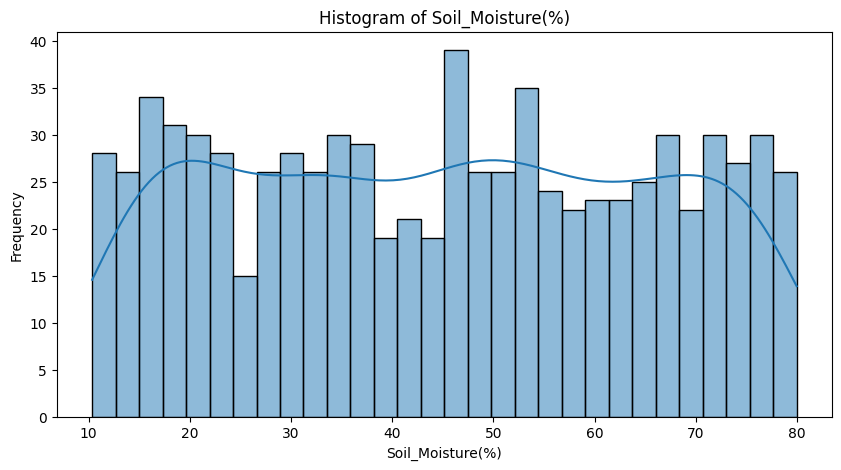

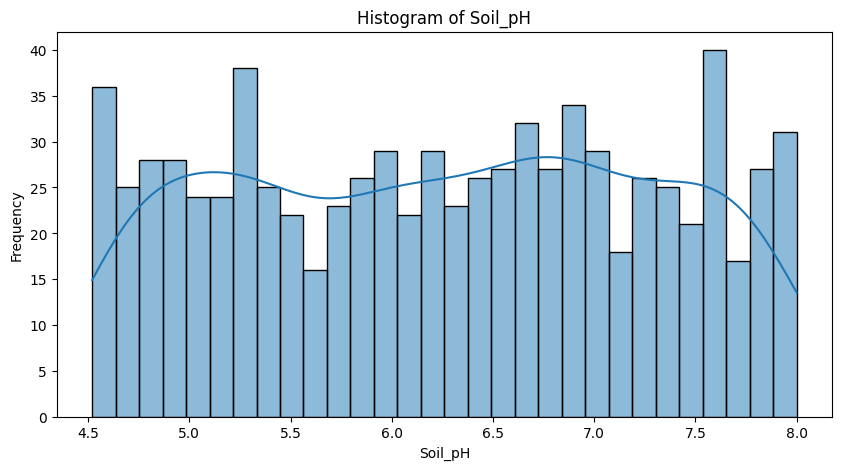

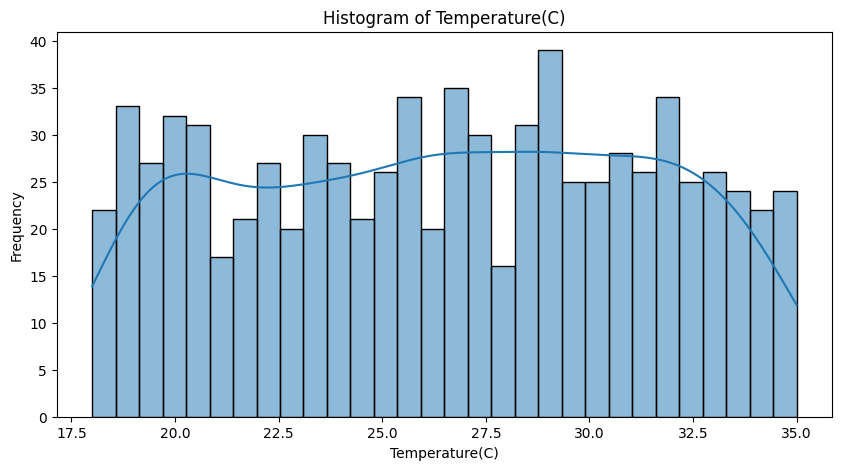

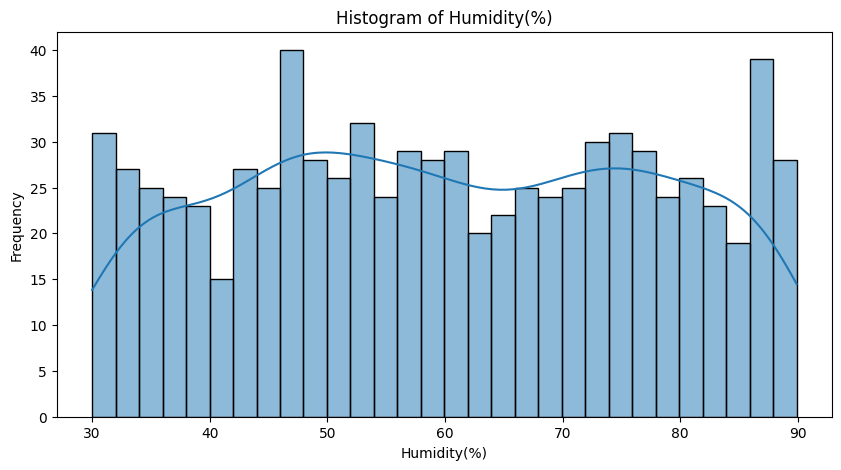

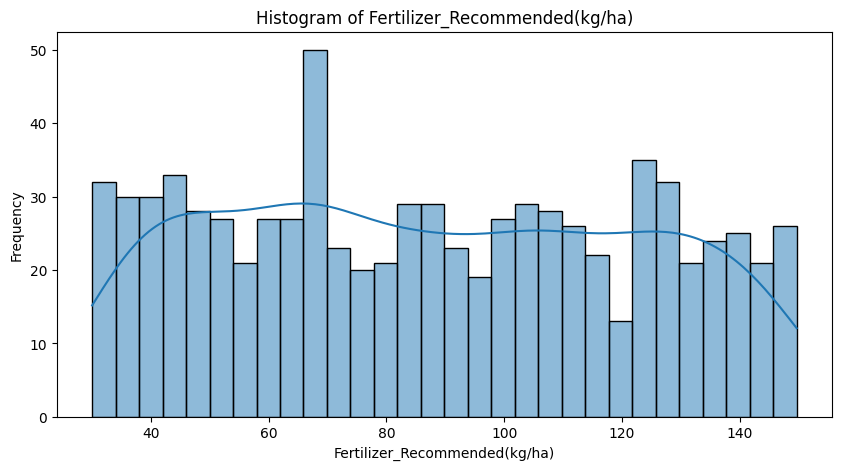

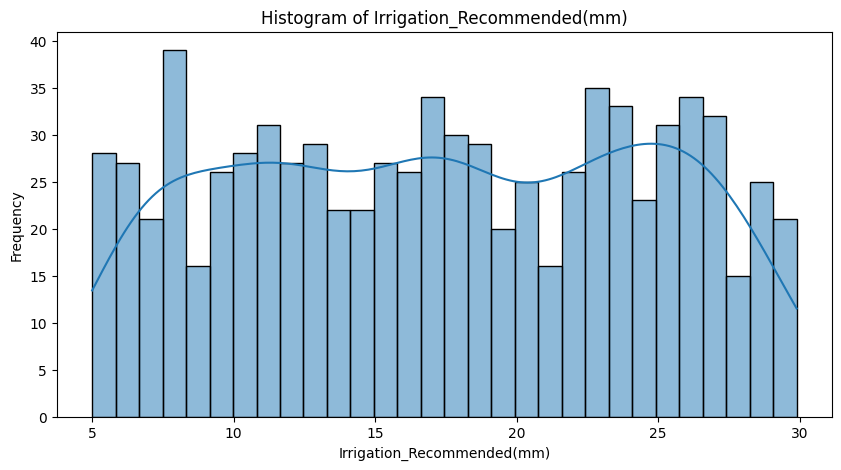

In [64]:
#Data analysis using histograms
def plot_histograms(df, columns):
    for col in columns:
        plt.figure(figsize=(10, 5))
        sns.histplot(df[col], kde=True, bins=30)
        plt.title(f'Histogram of {col}')
        plt.xlabel(col)
        plt.ylabel('Frequency')
        plt.grid()
        plt.show()
# Columns to plot histograms for
columns_to_plot = ['Soil_Moisture(%)', 'Soil_pH', 'Temperature(C)', 
                   'Humidity(%)', 'Fertilizer_Recommended(kg/ha)', 
                   'Irrigation_Recommended(mm)']
# Plot histograms for the specified columns
plot_histograms(df, columns_to_plot)


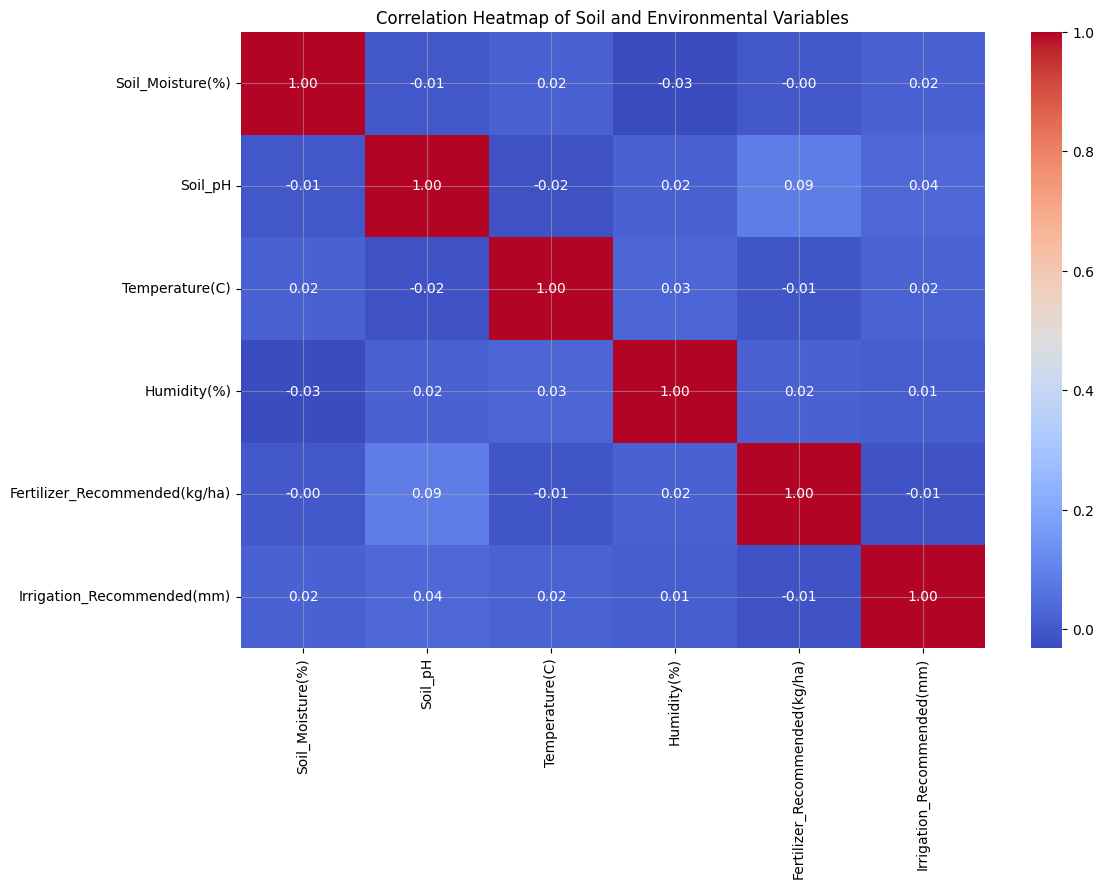

In [65]:
#Correlation heatmap to examine soil and environmental variables
def plot_correlation_heatmap(df, columns):
    plt.figure(figsize=(12, 8))
    correlation_matrix = df[columns].corr()
    sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
    plt.title('Correlation Heatmap of Soil and Environmental Variables')
    plt.show()
# Columns to include in the correlation heatmap
columns_for_heatmap = ['Soil_Moisture(%)', 'Soil_pH', 'Temperature(C)', 
                       'Humidity(%)', 'Fertilizer_Recommended(kg/ha)', 
                       'Irrigation_Recommended(mm)']
# Plot the correlation heatmap
plot_correlation_heatmap(df, columns_for_heatmap)


In [66]:
# Find variables most correlated with fertilizer recommendations
fert_corr = df.corr(numeric_only=True)['Fertilizer_Recommended(kg/ha)'].sort_values(ascending=False)
print("Correlation with Fertilizer_Recommended(kg/ha):")
print(fert_corr)

Correlation with Fertilizer_Recommended(kg/ha):
Fertilizer_Recommended(kg/ha)    1.000000
Soil_pH                          0.085570
Crop_Type_Code                   0.027417
Humidity(%)                      0.017062
Soil_Moisture(%)                -0.001722
Temperature(C)                  -0.008140
Irrigation_Recommended(mm)      -0.012448
Name: Fertilizer_Recommended(kg/ha), dtype: float64


In [67]:
# Find crop type with highest average soil moisture
avg_soil_moisture = df.groupby('Crop_Type')['Soil_Moisture(%)'].mean().sort_values(ascending=False)
print("Average Soil Moisture by Crop Type:")
print(avg_soil_moisture)
print(f"Crop type with highest average soil moisture: {avg_soil_moisture.idxmax()}")

Average Soil Moisture by Crop Type:
Crop_Type
Unknown     54.770000
Wheat       47.184041
Maize       44.953581
Beans       44.337781
Tomatoes    44.185392
Lettuce     42.932100
Name: Soil_Moisture(%), dtype: float64
Crop type with highest average soil moisture: Unknown


In [68]:
# Suggest irrigation adjustments for crops with average temperature > 30°C
hot_crops = df[df['Temperature(C)'] > 30]
irrigation_adjustments = hot_crops.groupby('Crop_Type')['Irrigation_Recommended(mm)'].mean().sort_values(ascending=False)
print("Average Irrigation Recommended for Crops with Temperature > 30°C:")
print(irrigation_adjustments)
print("\nRecommendation: Increase irrigation for these crops as higher temperatures increase evapotranspiration.")

Average Irrigation Recommended for Crops with Temperature > 30°C:
Crop_Type
Tomatoes    18.919565
Wheat       18.811429
Beans       17.857692
Maize       16.625455
Lettuce     16.297297
Unknown     15.750000
Name: Irrigation_Recommended(mm), dtype: float64

Recommendation: Increase irrigation for these crops as higher temperatures increase evapotranspiration.


In [69]:
#Export clean dataset as "cleaned_precision_agriculture_data.csv"
df.to_csv("cleaned_precision_agriculture_data.csv", index=False)
# Display the first few rows of the cleaned dataset
cleaned_df = pd.read_csv("cleaned_precision_agriculture_data.csv")
cleaned_df.head()       

,Sensor_ID,Date,Soil_Moisture(%),Soil_pH,Temperature(C),Humidity(%),Crop_Type,Fertilizer_Recommended(kg/ha),Irrigation_Recommended(mm),Drone_Image_ID,Crop_Type_Code
0,SEN-1000,2025-01-01,36.22,6.98,21.3,50.4,Tomatoes,67.6,26.6,IMG-2000,3
1,SEN-1001,2025-01-02,76.55,5.03,23.5,34.3,Wheat,130.4,8.3,IMG-2001,5
2,SEN-1002,2025-01-03,61.24,6.52,21.9,54.6,Tomatoes,36.0,29.4,IMG-2002,3
3,SEN-1003,2025-01-04,51.91,6.62,24.0,48.7,Maize,85.8,19.6,IMG-2003,2
4,SEN-1004,2025-01-05,20.92,5.98,19.2,70.6,Wheat,75.6,29.9,IMG-2004,5


In [70]:
cleaned_df.shape

(798, 11)